## importing needed libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from matplotlib.patches import Patch
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler


%matplotlib inline

## importing dataset

In [4]:
df = pd.read_csv('fraud_oracle.csv')

# PART 1

## exploring data

In [5]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994.0,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994.0,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994.0,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994.0,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994.0,Collision


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4482 entries, 0 to 4481
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 4482 non-null   object 
 1   WeekOfMonth           4482 non-null   int64  
 2   DayOfWeek             4482 non-null   object 
 3   Make                  4482 non-null   object 
 4   AccidentArea          4482 non-null   object 
 5   DayOfWeekClaimed      4482 non-null   object 
 6   MonthClaimed          4482 non-null   object 
 7   WeekOfMonthClaimed    4482 non-null   int64  
 8   Sex                   4482 non-null   object 
 9   MaritalStatus         4482 non-null   object 
 10  Age                   4482 non-null   int64  
 11  Fault                 4482 non-null   object 
 12  PolicyType            4482 non-null   object 
 13  VehicleCategory       4481 non-null   object 
 14  VehiclePrice          4481 non-null   object 
 15  FraudFound_P         

In [7]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [8]:
df.nunique()

Month                     12
WeekOfMonth                5
DayOfWeek                  7
Make                      17
AccidentArea               2
DayOfWeekClaimed           8
MonthClaimed              13
WeekOfMonthClaimed         5
Sex                        2
MaritalStatus              4
Age                       66
Fault                      2
PolicyType                10
VehicleCategory            3
VehiclePrice               6
FraudFound_P               2
PolicyNumber            4481
RepNumber                 16
Deductible                 4
DriverRating               4
Days_Policy_Accident       5
Days_Policy_Claim          4
PastNumberOfClaims         4
AgeOfVehicle               8
AgeOfPolicyHolder          9
PoliceReportFiled          2
WitnessPresent             2
AgentType                  2
NumberOfSuppliments        4
AddressChange_Claim        5
NumberOfCars               5
Year                       1
BasePolicy                 3
dtype: int64

## handling null_values

In [9]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         1
VehiclePrice            1
FraudFound_P            1
PolicyNumber            1
RepNumber               1
Deductible              1
DriverRating            1
Days_Policy_Accident    1
Days_Policy_Claim       1
PastNumberOfClaims      1
AgeOfVehicle            1
AgeOfPolicyHolder       1
PoliceReportFiled       1
WitnessPresent          1
AgentType               1
NumberOfSuppliments     1
AddressChange_Claim     1
NumberOfCars            1
Year                    1
BasePolicy              1
dtype: int64

In [10]:
df.dropna(inplace=True) 
df = df[(np.abs(df['WeekOfMonth'] - df['WeekOfMonth'].mean()) / df['WeekOfMonth'].std()) < 3]  # Remove outliers using z-score


## showing data

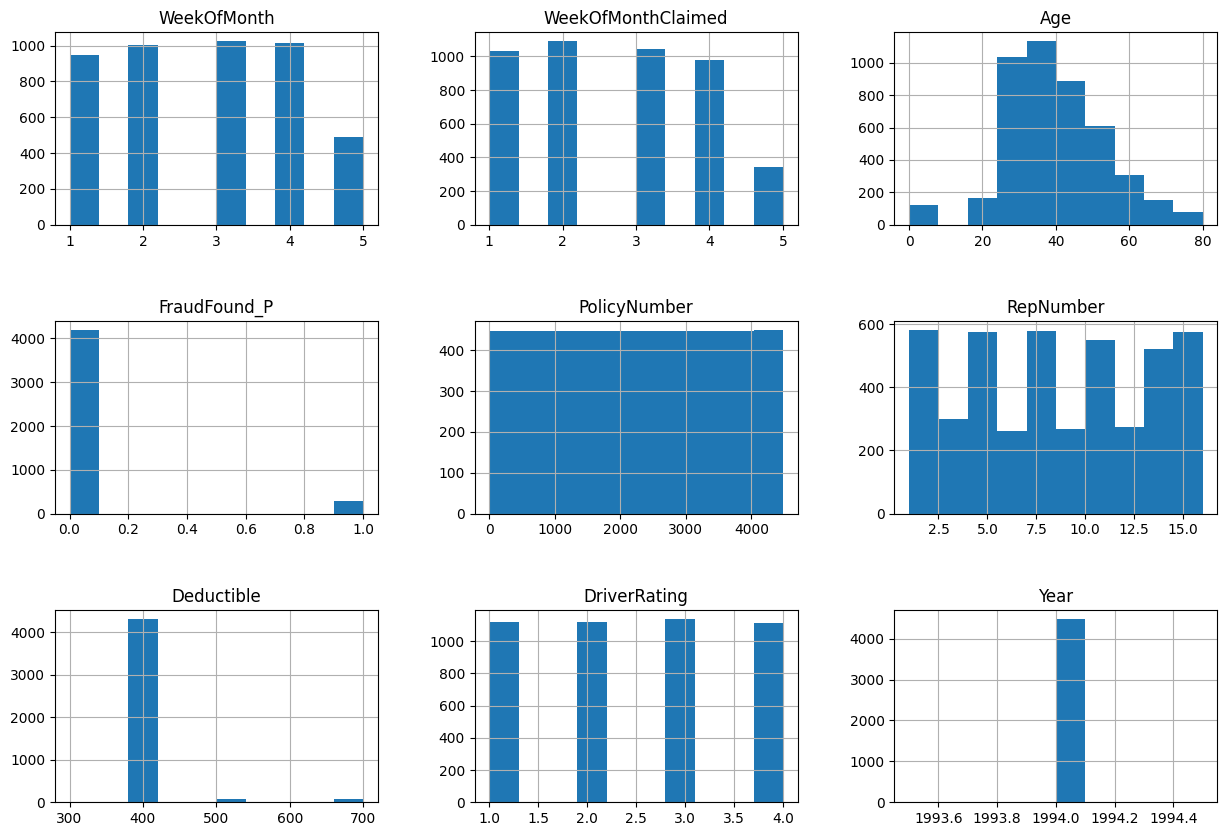

In [11]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

## find distribution of Categorical Columns

### feature name: month

<ipython-input-12-9658ae7bb3b7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x ='Month',stat="probability",palette = 'hls',data = df)


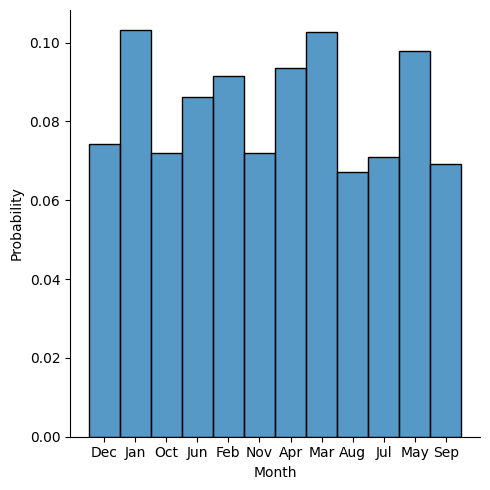

In [12]:
sns.displot(x ='Month',stat="probability",palette = 'hls',data = df)
plt.tight_layout()
plt.show()

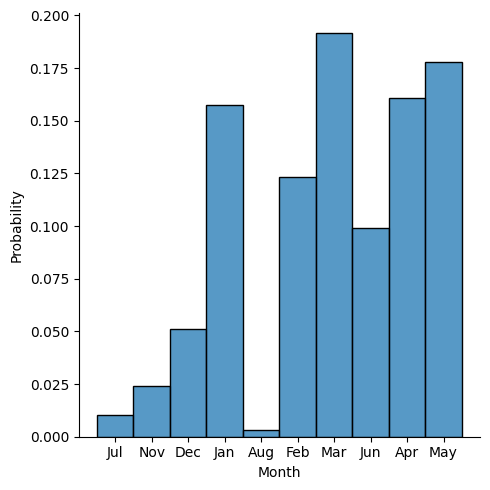

In [13]:
df_test1=df.loc[df['FraudFound_P']==1]
sns.displot(x ='Month',stat="probability",data = df_test1)
plt.tight_layout()
plt.show()

### feature name: make (company of the car)

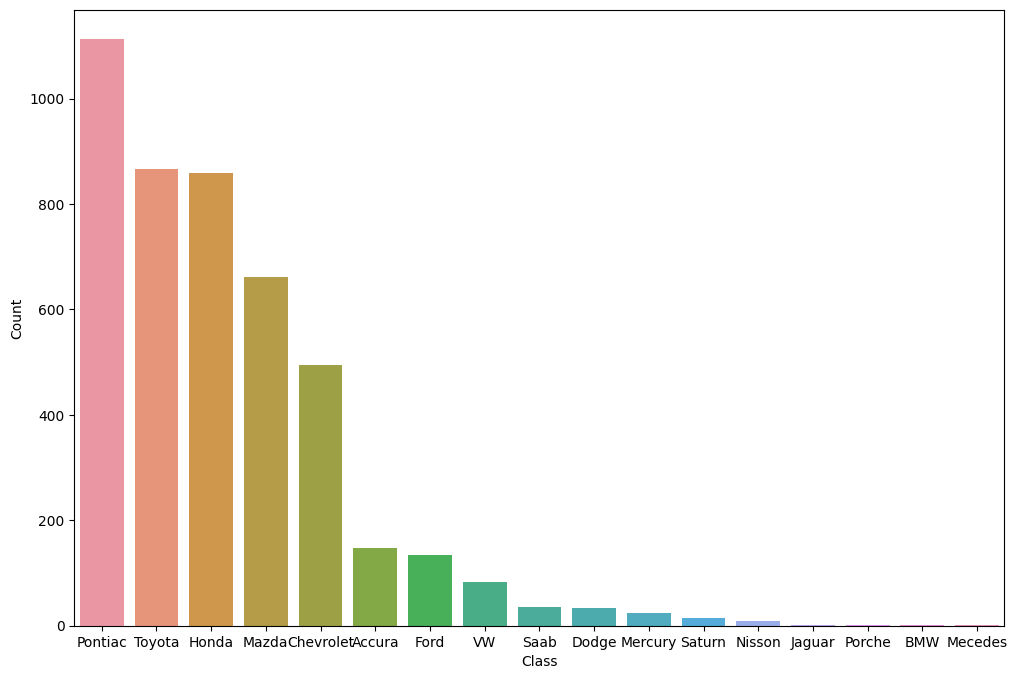

In [14]:
plt.figure(figsize=(12, 8))
company = sns.countplot(x="Make",order=df['Make'].value_counts().index ,data=df)
company.set(xlabel='Class', ylabel='Count')
plt.show()

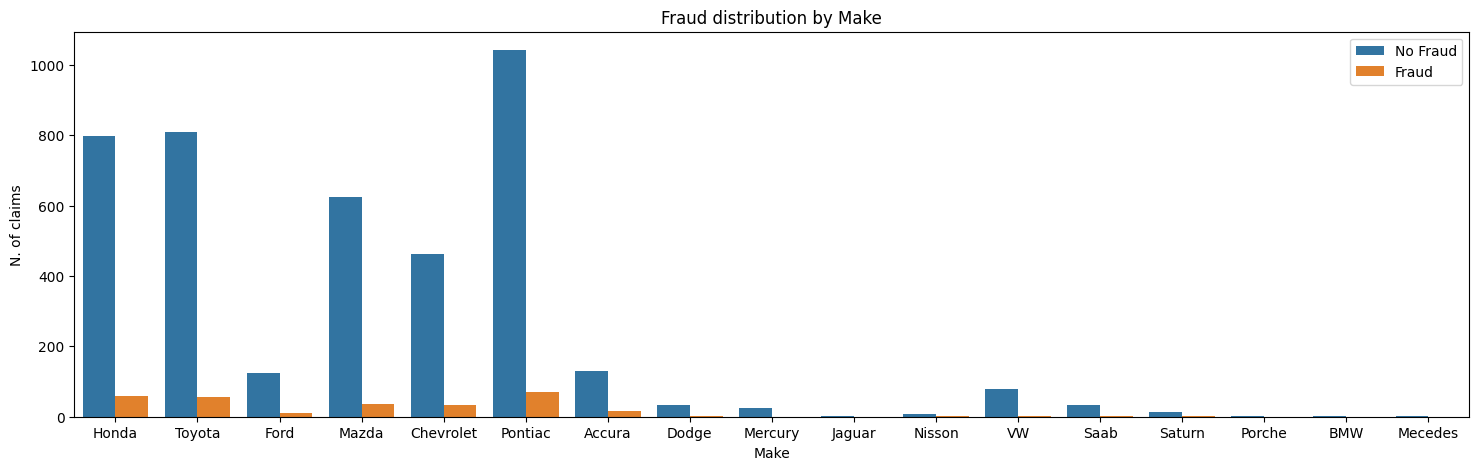

In [15]:
plt.figure(figsize=(18, 5))

df_fraud = df.loc[df['FraudFound_P']==1]
df_no_fraud = df.loc[df['FraudFound_P']==0]

sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)

labels = ['No Fraud', 'Fraud']
plt.legend(labels)
plt.title('Fraud distribution by Make')
plt.xlabel('Make')
plt.ylabel('N. of claims')
plt.show()

### feature name: sex type

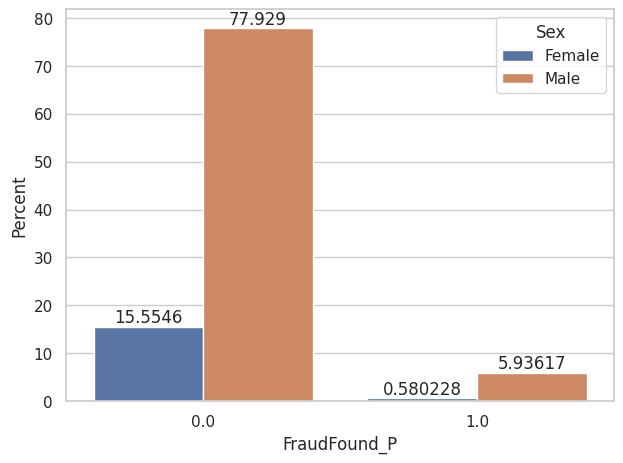

In [16]:
sns.set(style="whitegrid")
ax=sns.barplot(data=df,x='FraudFound_P', y='FraudFound_P',hue='Sex',estimator=lambda x: len(x) / len(df) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

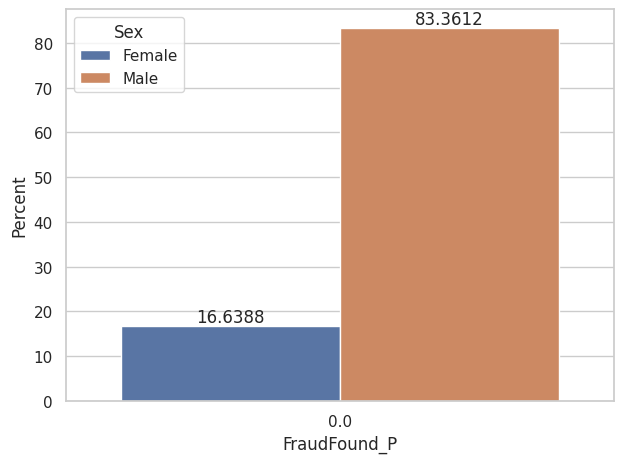

In [17]:
df1=df.loc[df['FraudFound_P']==0]
sns.set(style="whitegrid")  
ax=sns.barplot(data=df1,x='FraudFound_P',y='FraudFound_P',hue='Sex',estimator=lambda x: len(x) / len(df1) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
    plt.tight_layout()
plt.show()

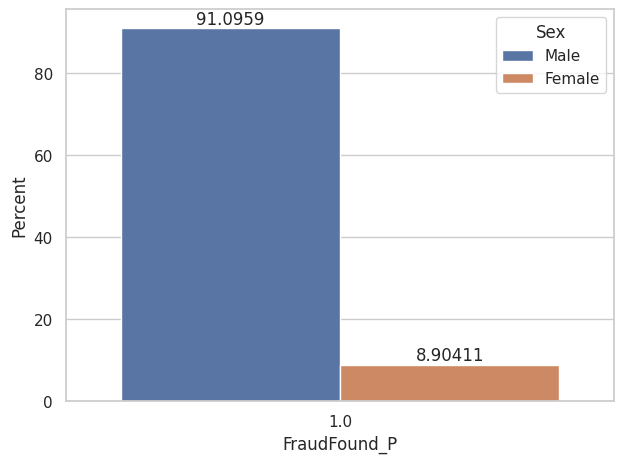

In [18]:
df2=df.loc[df['FraudFound_P']==1]
sns.set(style="whitegrid") 
ax=sns.barplot(data=df2,x='FraudFound_P',y='FraudFound_P',hue='Sex',estimator=lambda x: len(x) / len(df2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### feature name: DayOfWeek

In [19]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['Date'] = pd.Categorical(df['DayOfWeek'], categories=days, ordered=True)
df = df.sort_values('Date')

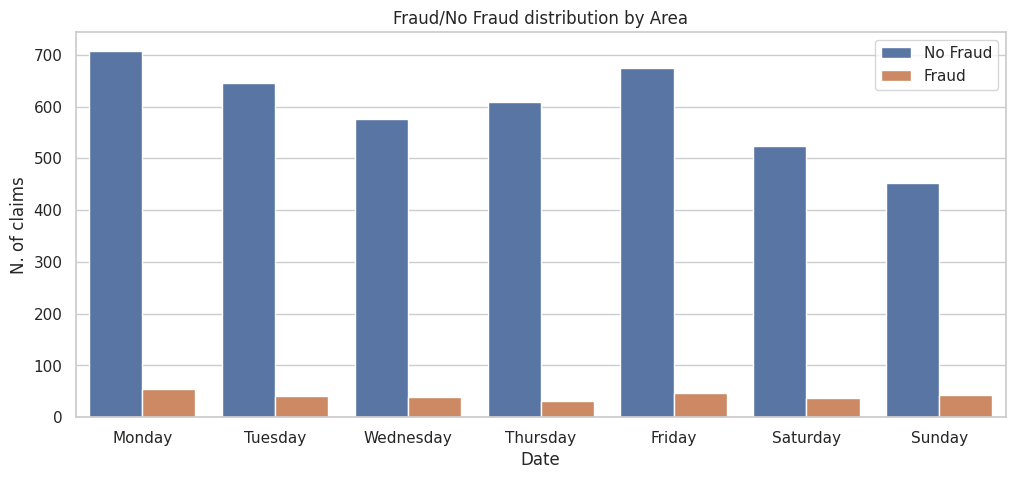

In [20]:
plt.figure(figsize=(12, 5))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="Date", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')

plt.ylabel('N. of claims')
plt.show()

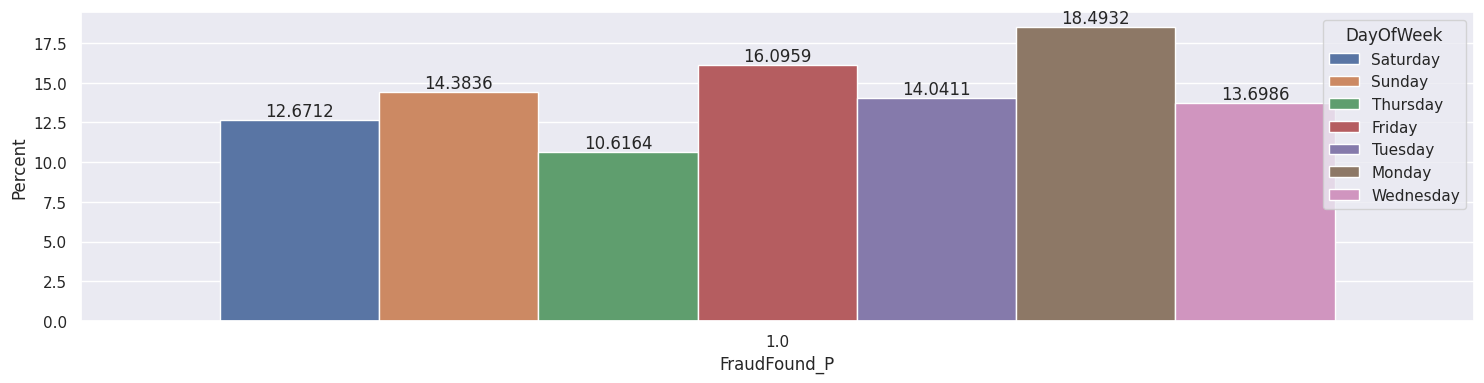

In [21]:
sns.set() 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=df2,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',
              estimator=lambda x: len(x) / len(df2) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

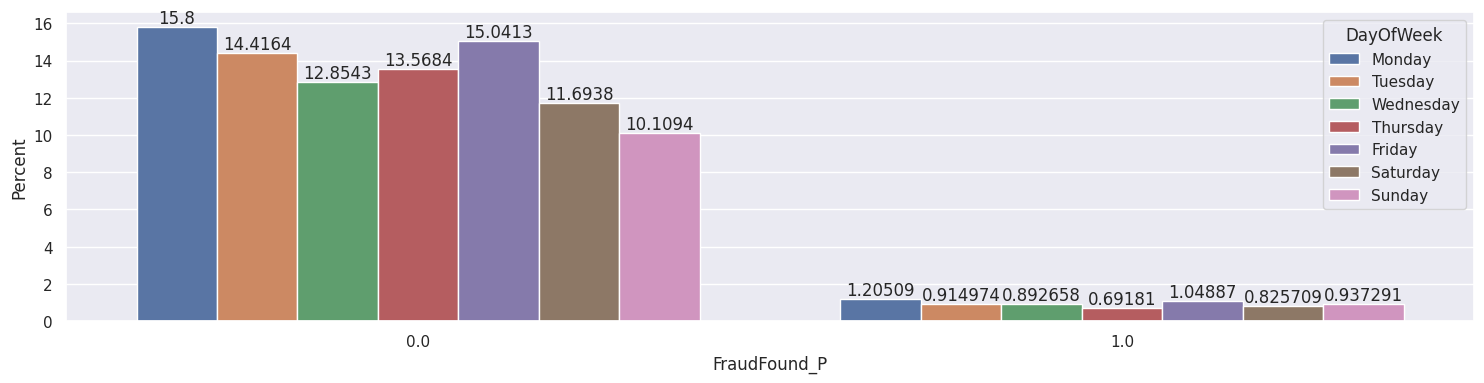

In [22]:
sns.set() 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=df,x='FraudFound_P', y='FraudFound_P',hue='DayOfWeek',estimator=lambda x: len(x) / len(df) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### feature name:Age

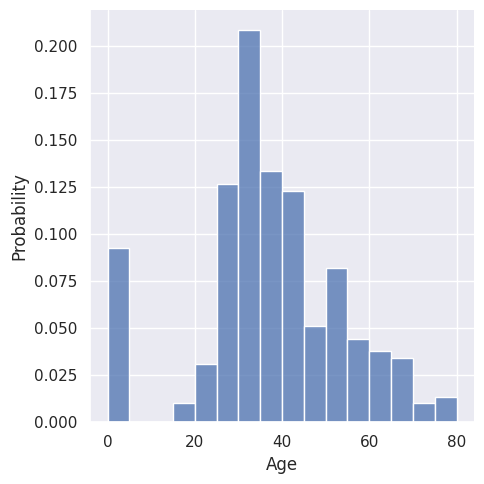

In [23]:
sns.displot(x ='Age',stat="probability",data = df2)
plt.show()

### feature name: Vehicle category

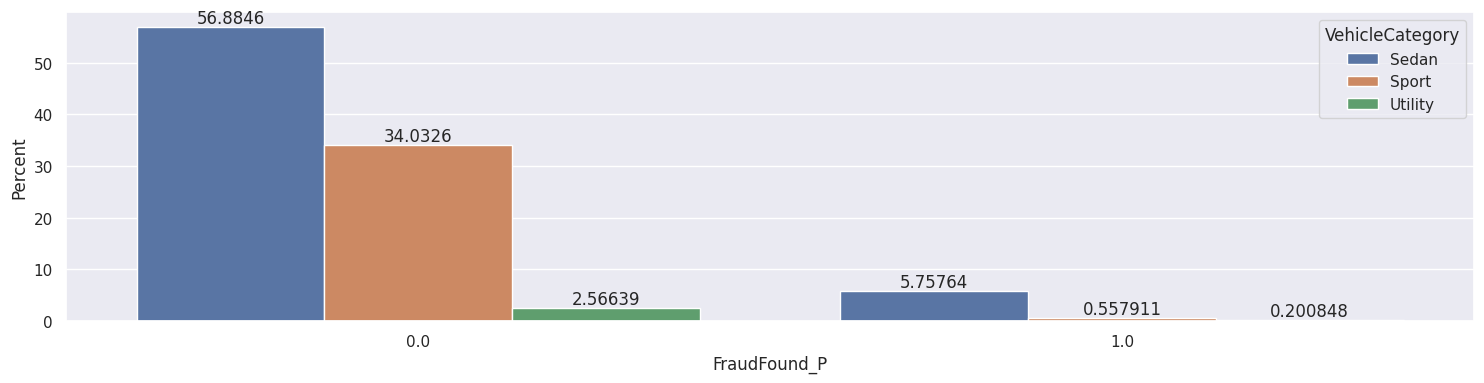

In [24]:
sns.set() 
plt.figure(figsize=(15,4))
ax=sns.barplot(data=df,x='FraudFound_P', y='FraudFound_P',hue='VehicleCategory',estimator=lambda x: len(x) / len(df) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### feature name: Accident Area

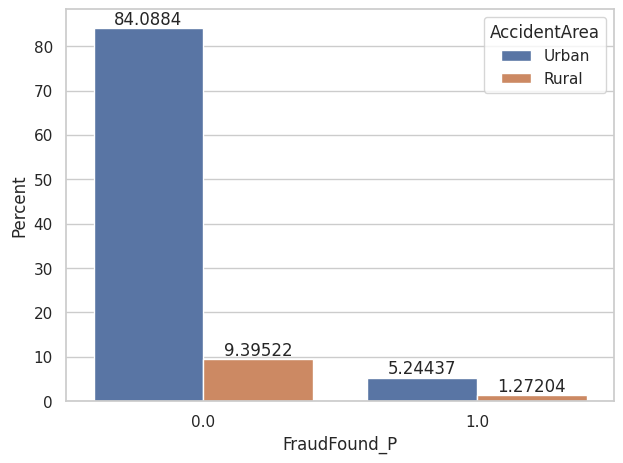

In [25]:
sns.set(style="whitegrid") 
ax=sns.barplot(data=df,x='FraudFound_P',y='FraudFound_P',hue='AccidentArea',estimator=lambda x: len(x) / len(df) * 100)
for container in ax.containers:
    ax.bar_label(container)
    ax.set(ylabel="Percent")
plt.tight_layout()
plt.show()

### feature name: DriverRating

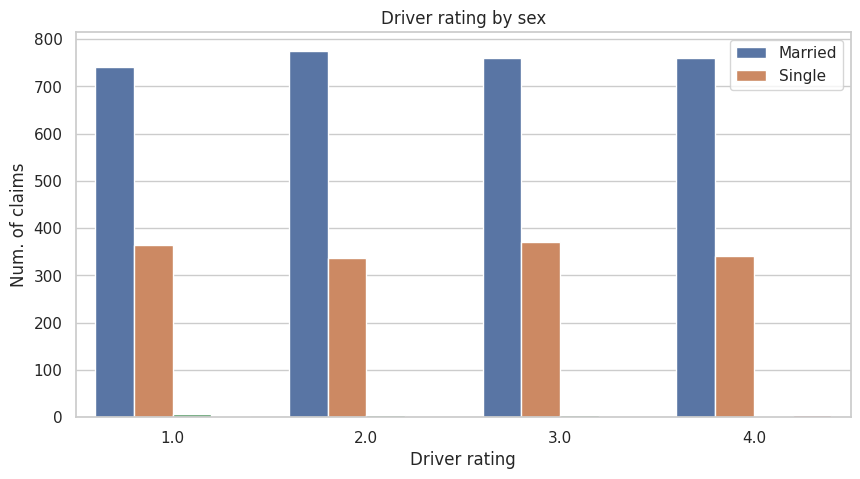

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'DriverRating', hue = 'MaritalStatus', data = df)

plt.legend(labels = ['Married','Single'], loc = 'upper right')
plt.ylabel('Num. of claims')
plt.xlabel('Driver rating')
plt.title('Driver rating by sex')
plt.show()

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Month
Apr    0.112172
Aug    0.003322
Dec    0.045045
Feb    0.087805
Jan    0.099567
Jul    0.009434
Jun    0.075130
Mar    0.121739
May    0.118721
Nov    0.021739
Oct    0.000000
Sep    0.000000
Name: FraudFound_P, dtype: float64
Month
Apr    0.315955
Aug    0.057639
Dec    0.207715
Feb    0.283357
Jan    0.299747
Jul    0.096822
Jun    0.263942
Mar    0.327340
May    0.323830
Nov    0.146057
Oct    0.000000
Sep    0.000000
Name: FraudFound_P, dtype: float64


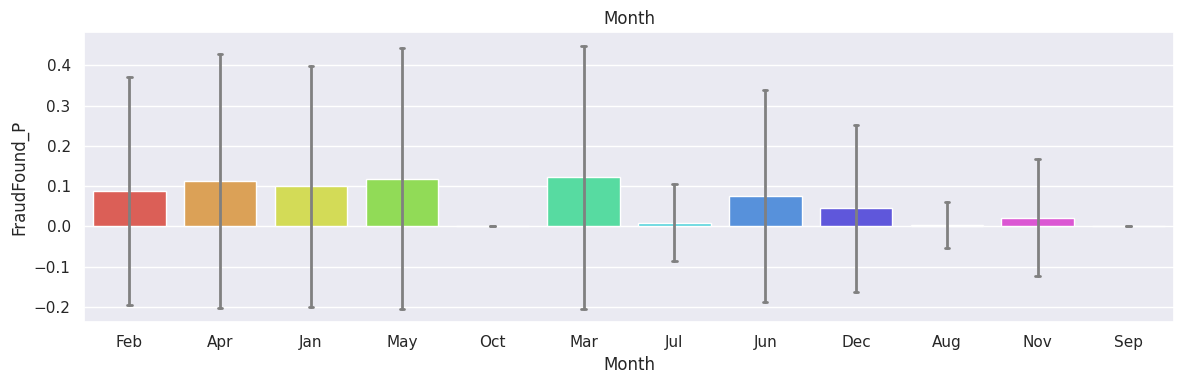

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


WeekOfMonth
1    0.071882
2    0.070647
3    0.055718
4    0.064961
5    0.061100
Name: FraudFound_P, dtype: float64
WeekOfMonth
1    0.258428
2    0.256361
3    0.229489
4    0.246578
5    0.239758
Name: FraudFound_P, dtype: float64


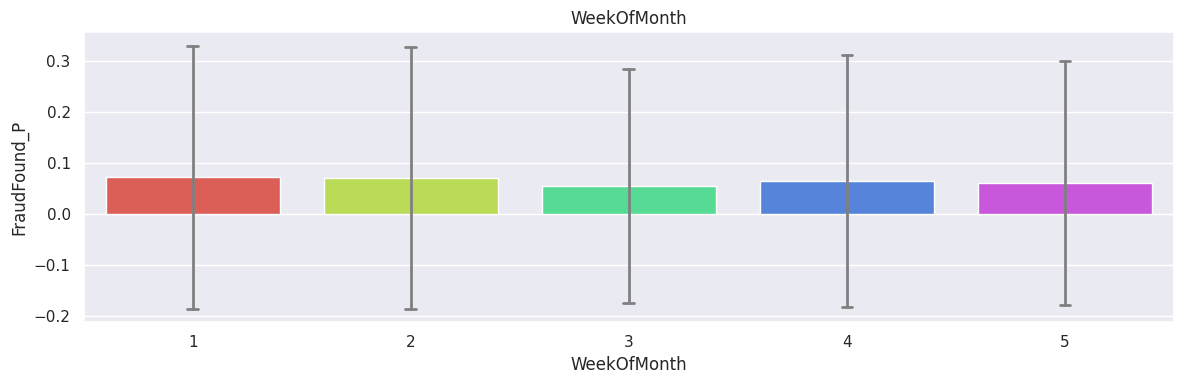

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


DayOfWeek
Friday       0.065187
Monday       0.070866
Saturday     0.065954
Sunday       0.084848
Thursday     0.048513
Tuesday      0.059680
Wednesday    0.064935
Name: FraudFound_P, dtype: float64
DayOfWeek
Friday       0.247027
Monday       0.256770
Saturday     0.248423
Sunday       0.278938
Thursday     0.215017
Tuesday      0.237065
Wednesday    0.246611
Name: FraudFound_P, dtype: float64


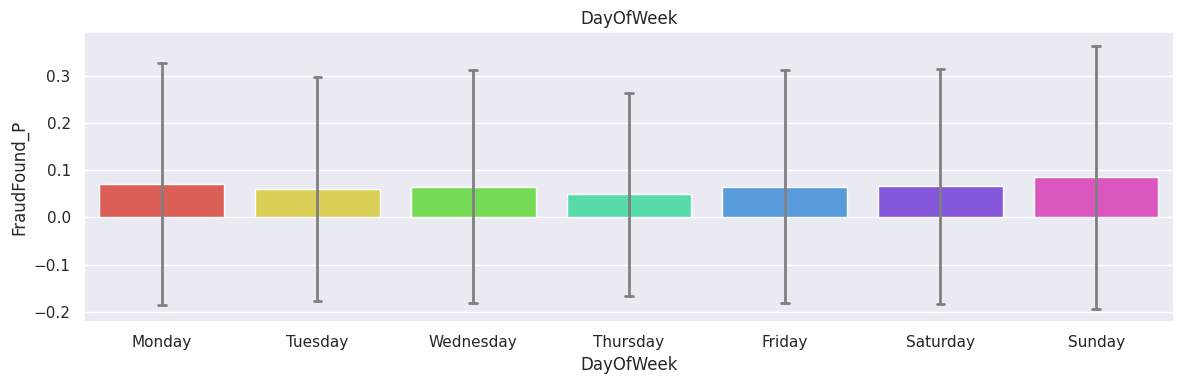

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Make
Accura       0.114865
BMW          0.000000
Chevrolet    0.064777
Dodge        0.030303
Ford         0.082090
Honda        0.069930
Jaguar       0.000000
Mazda        0.055891
Mecedes      0.000000
Mercury      0.000000
Nisson       0.111111
Pontiac      0.063792
Porche       0.000000
Saab         0.057143
Saturn       0.066667
Toyota       0.065744
VW           0.024390
Name: FraudFound_P, dtype: float64
Make
Accura       0.319942
BMW          0.000000
Chevrolet    0.246382
Dodge        0.174078
Ford         0.275531
Honda        0.255178
Jaguar       0.000000
Mazda        0.229885
Mecedes           NaN
Mercury      0.000000
Nisson       0.333333
Pontiac      0.244491
Porche       0.000000
Saab         0.235504
Saturn       0.258199
Toyota       0.247977
VW           0.155207
Name: FraudFound_P, dtype: float64


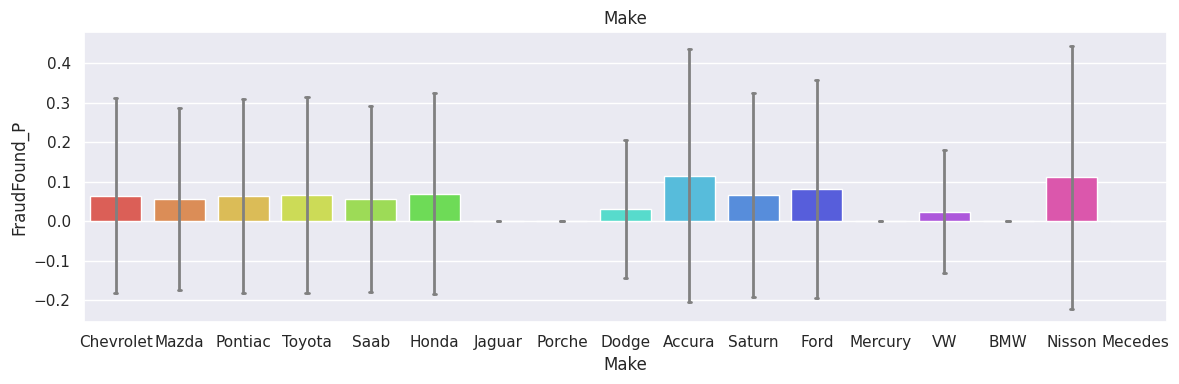

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


AccidentArea
Rural    0.119247
Urban    0.058706
Name: FraudFound_P, dtype: float64
AccidentArea
Rural    0.324418
Urban    0.235103
Name: FraudFound_P, dtype: float64


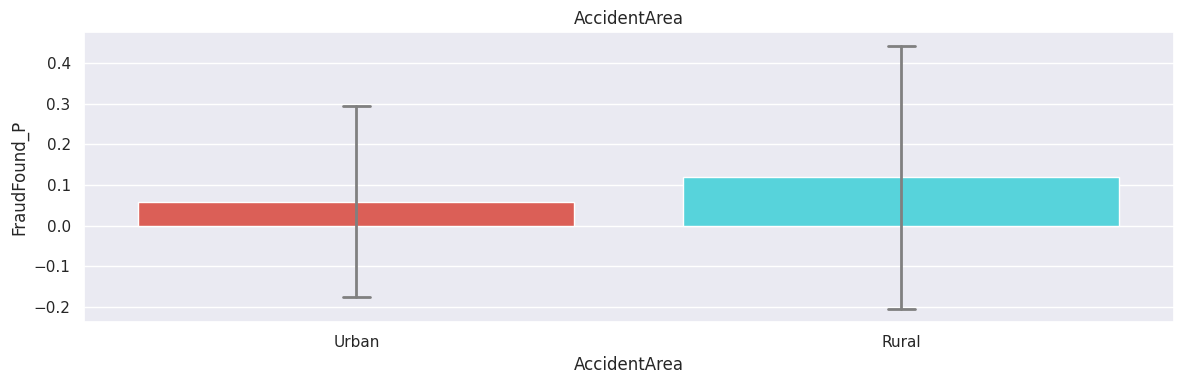

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


DayOfWeekClaimed
0            0.000000
Friday       0.075342
Monday       0.064067
Saturday     0.000000
Sunday       0.000000
Thursday     0.045033
Tuesday      0.077458
Wednesday    0.065574
Name: FraudFound_P, dtype: float64
DayOfWeekClaimed
0                 NaN
Friday       0.264124
Monday       0.244986
Saturday     0.000000
Sunday       0.000000
Thursday     0.207514
Tuesday      0.267449
Wednesday    0.247681
Name: FraudFound_P, dtype: float64


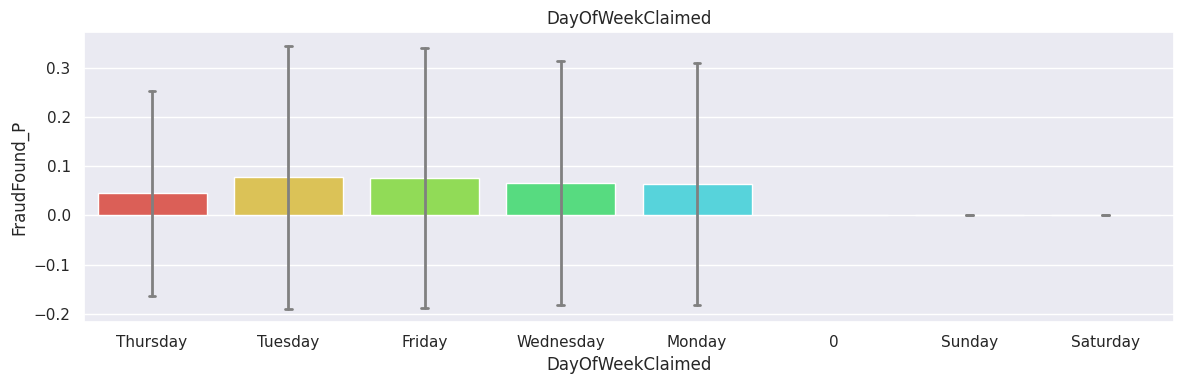

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


MonthClaimed
0      0.000000
Apr    0.124700
Aug    0.009934
Dec    0.010989
Feb    0.090909
Jan    0.097561
Jul    0.015873
Jun    0.101010
Mar    0.095652
May    0.126087
Nov    0.005917
Oct    0.005952
Sep    0.003185
Name: FraudFound_P, dtype: float64
MonthClaimed
0           NaN
Apr    0.330776
Aug    0.099337
Dec    0.104442
Feb    0.287824
Jan    0.297050
Jul    0.125183
Jun    0.301723
Mar    0.294434
May    0.332309
Nov    0.076809
Oct    0.077036
Sep    0.056433
Name: FraudFound_P, dtype: float64


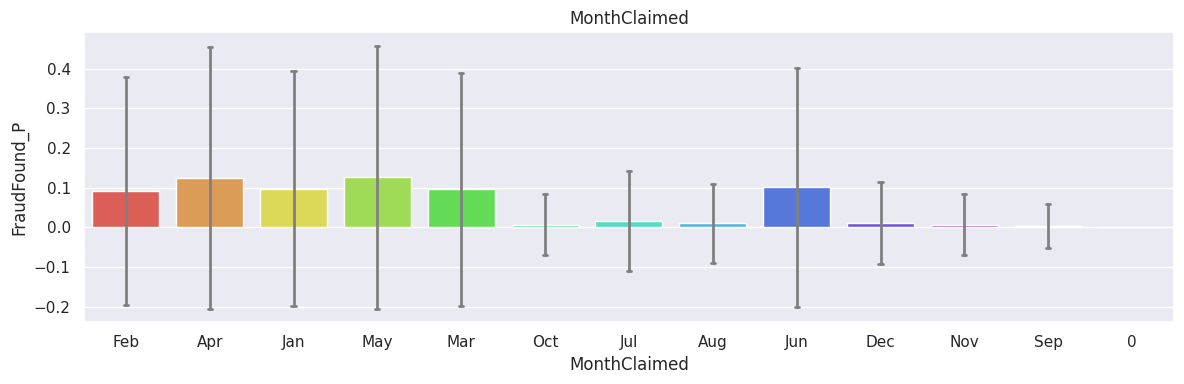

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


WeekOfMonthClaimed
1    0.078565
2    0.072544
3    0.064176
4    0.053279
5    0.038123
Name: FraudFound_P, dtype: float64
WeekOfMonthClaimed
1    0.269188
2    0.259505
3    0.245184
4    0.224704
5    0.191775
Name: FraudFound_P, dtype: float64


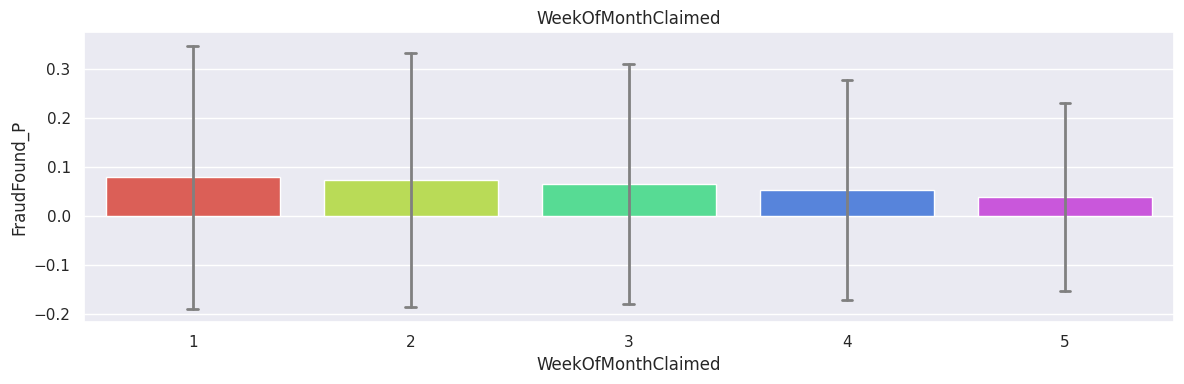

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Sex
Female    0.035961
Male      0.070782
Name: FraudFound_P, dtype: float64
Sex
Female    0.186323
Male      0.256495
Name: FraudFound_P, dtype: float64


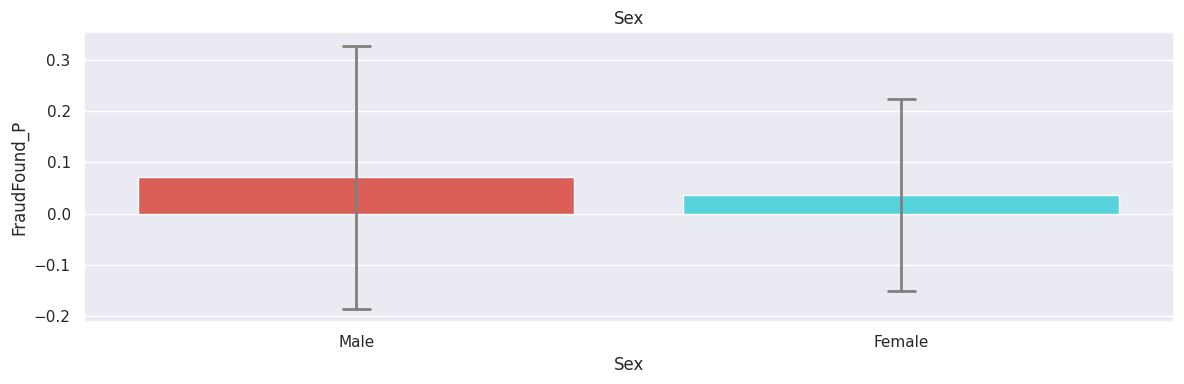

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


MaritalStatus
Divorced    0.100000
Married     0.063220
Single      0.069258
Widow       0.000000
Name: FraudFound_P, dtype: float64
MaritalStatus
Divorced    0.307794
Married     0.243399
Single      0.253982
Widow       0.000000
Name: FraudFound_P, dtype: float64


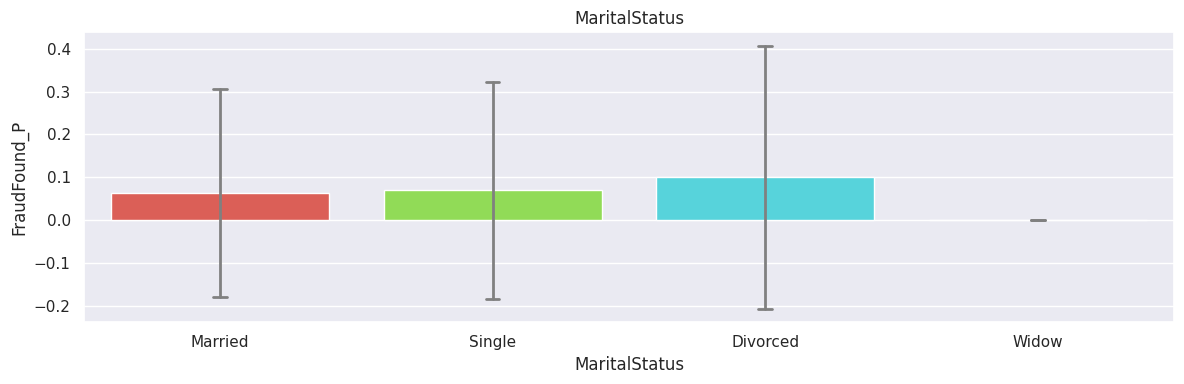

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Fault
Policy Holder    0.085333
Third Party      0.009259
Name: FraudFound_P, dtype: float64
Fault
Policy Holder    0.279418
Third Party      0.095819
Name: FraudFound_P, dtype: float64


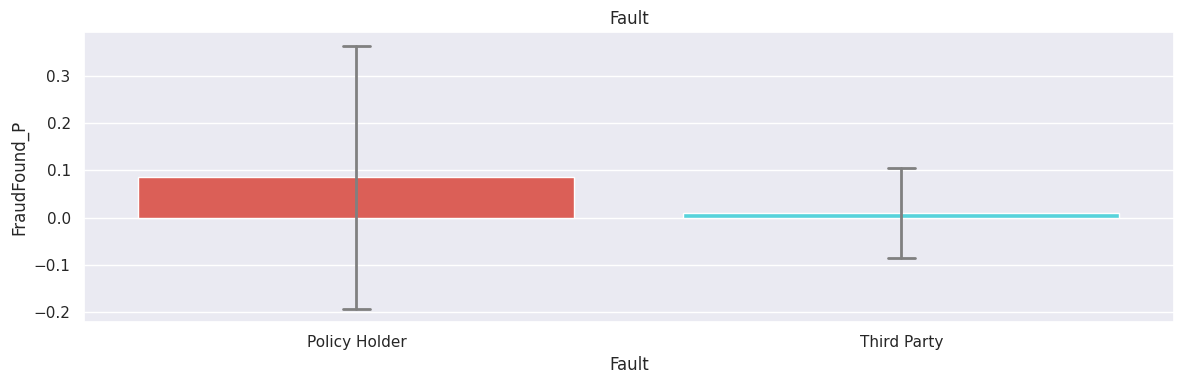

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


PolicyType
Sedan - All Perils      0.128099
Sedan - Collision       0.064496
Sedan - Liability       0.008615
Sport - All Perils      0.000000
Sport - Collision       0.087248
Sport - Liability       0.000000
Utility - All Perils    0.082569
Utility - Collision     0.000000
Utility - Liability     0.000000
Name: FraudFound_P, dtype: float64
PolicyType
Sedan - All Perils      0.334338
Sedan - Collision       0.245711
Sedan - Liability       0.092447
Sport - All Perils      0.000000
Sport - Collision       0.283150
Sport - Liability            NaN
Utility - All Perils    0.276501
Utility - Collision     0.000000
Utility - Liability     0.000000
Name: FraudFound_P, dtype: float64


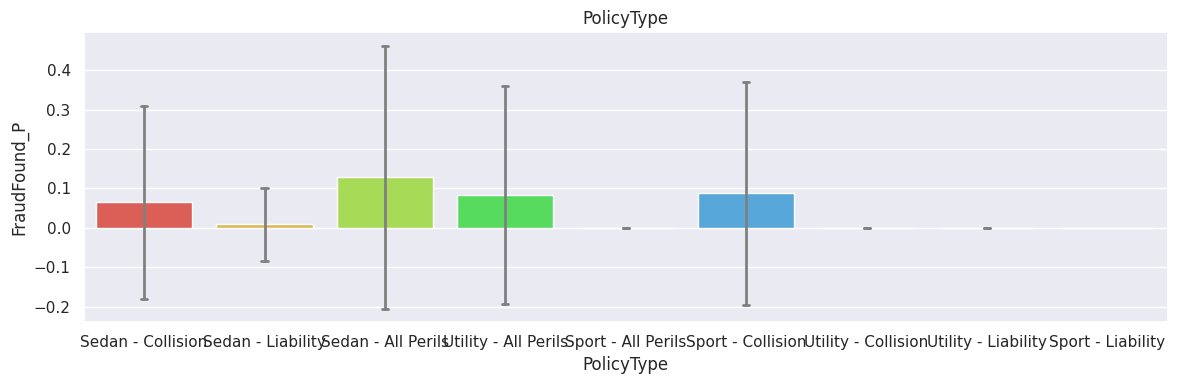

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


VehicleCategory
Sedan      0.091913
Sport      0.016129
Utility    0.072581
Name: FraudFound_P, dtype: float64
VehicleCategory
Sedan      0.288955
Sport      0.126012
Utility    0.260499
Name: FraudFound_P, dtype: float64


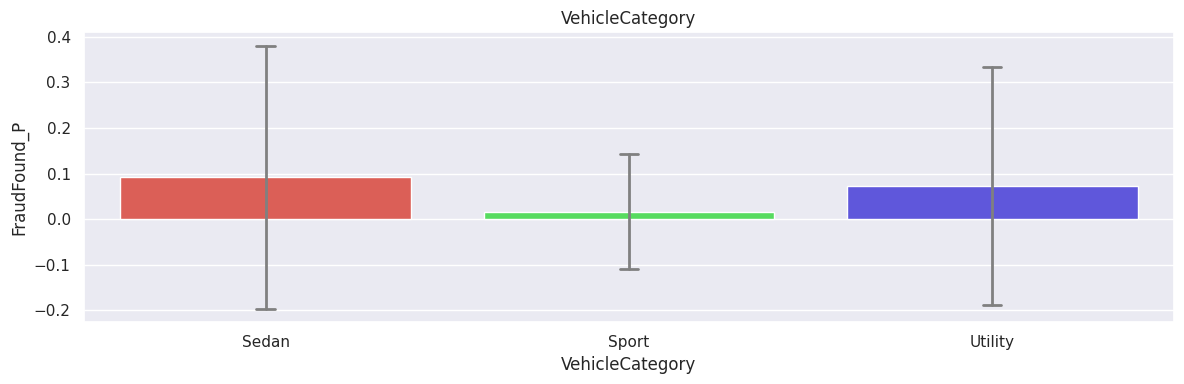

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


VehiclePrice
20000 to 29000     0.051260
30000 to 39000     0.062437
40000 to 59000     0.095652
60000 to 69000     0.045455
less than 20000    0.093023
more than 69000    0.096257
Name: FraudFound_P, dtype: float64
VehiclePrice
20000 to 29000     0.220575
30000 to 39000     0.242070
40000 to 59000     0.295401
60000 to 69000     0.213201
less than 20000    0.290949
more than 69000    0.295140
Name: FraudFound_P, dtype: float64


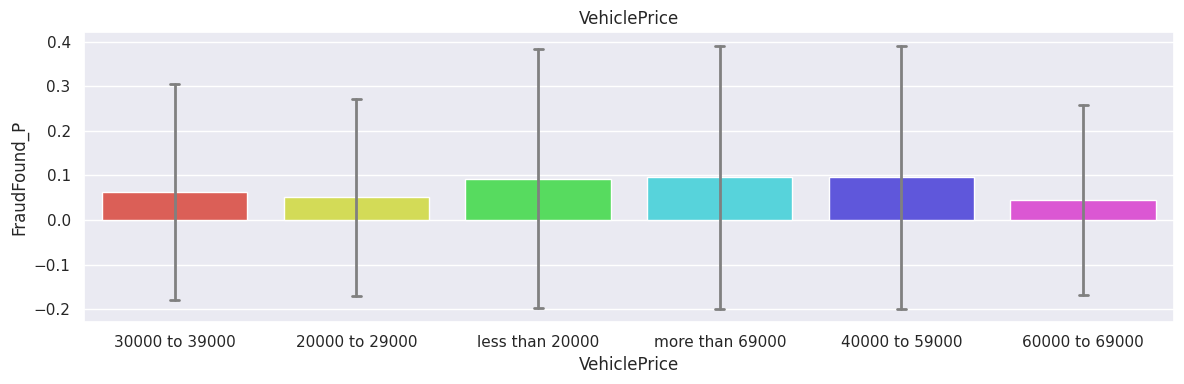

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Deductible
300.0    0.000000
400.0    0.063021
500.0    0.184211
700.0    0.068966
Name: FraudFound_P, dtype: float64
Deductible
300.0    0.000000
400.0    0.243029
500.0    0.390232
700.0    0.254864
Name: FraudFound_P, dtype: float64


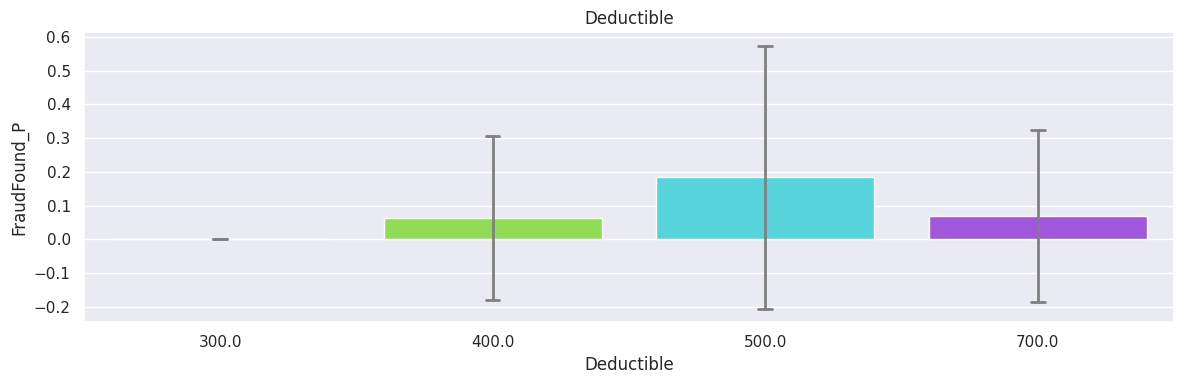

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


DriverRating
1.0    0.071685
2.0    0.061662
3.0    0.058047
4.0    0.069432
Name: FraudFound_P, dtype: float64
DriverRating
1.0    0.258081
2.0    0.240649
3.0    0.233936
4.0    0.254302
Name: FraudFound_P, dtype: float64


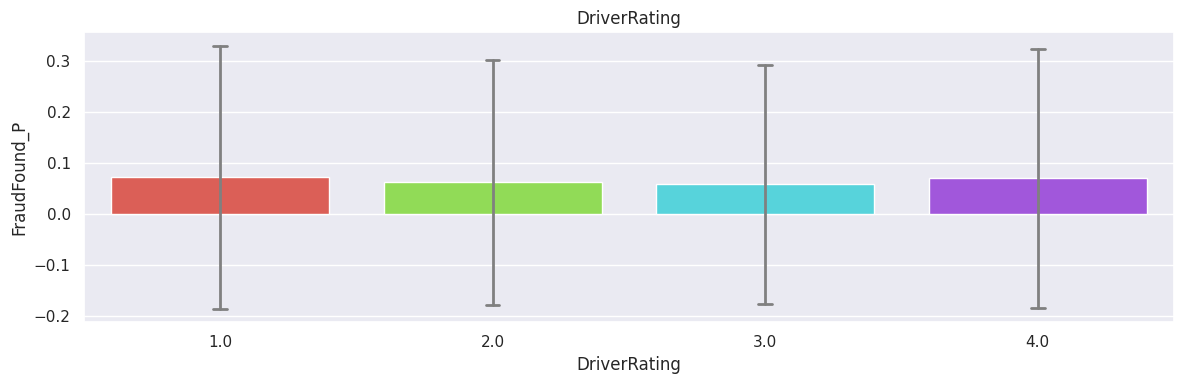

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Days_Policy_Accident
1 to 7          0.125000
15 to 30        0.000000
8 to 15         0.083333
more than 30    0.064844
none            0.166667
Name: FraudFound_P, dtype: float64
Days_Policy_Accident
1 to 7          0.353553
15 to 30        0.000000
8 to 15         0.288675
more than 30    0.246278
none            0.383482
Name: FraudFound_P, dtype: float64


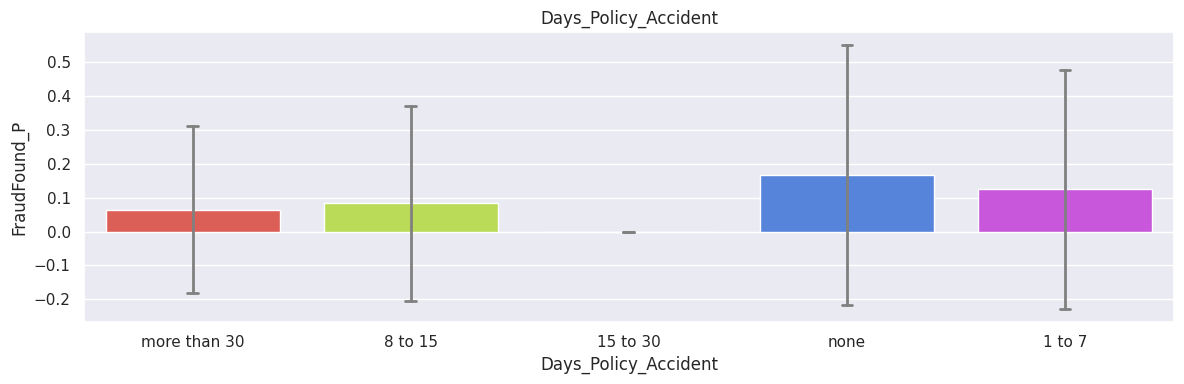

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Days_Policy_Claim
15 to 30        0.090909
8 to 15         0.333333
more than 30    0.064690
none            0.000000
Name: FraudFound_P, dtype: float64
Days_Policy_Claim
15 to 30        0.294245
8 to 15         0.516398
more than 30    0.246006
none                 NaN
Name: FraudFound_P, dtype: float64


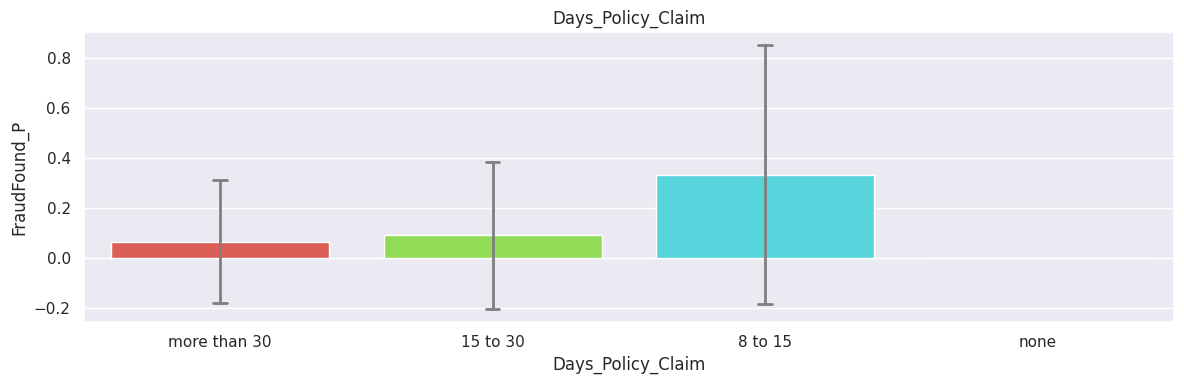

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


PastNumberOfClaims
1              0.072793
2 to 4         0.062421
more than 4    0.022388
none           0.080159
Name: FraudFound_P, dtype: float64
PastNumberOfClaims
1              0.259915
2 to 4         0.241995
more than 4    0.148080
none           0.271647
Name: FraudFound_P, dtype: float64


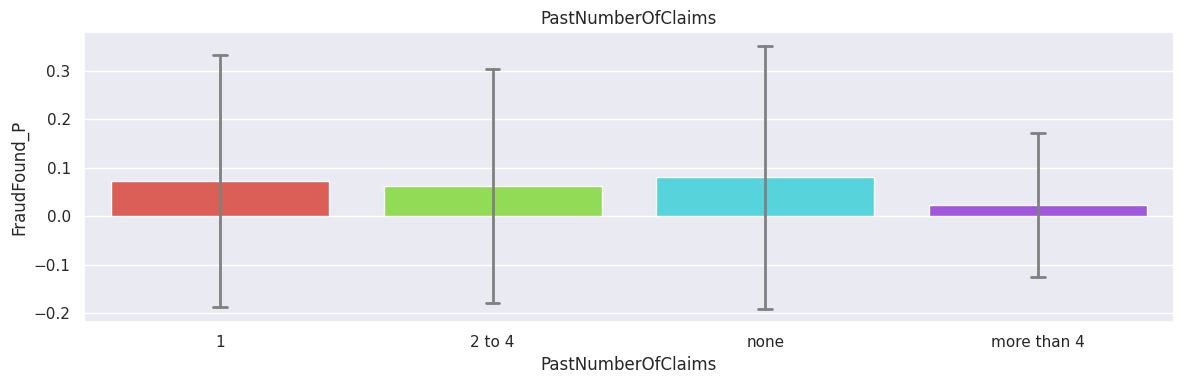

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


AgeOfVehicle
2 years        0.000000
3 years        0.096154
4 years        0.041096
5 years        0.071960
6 years        0.061803
7 years        0.060191
more than 7    0.057522
new            0.201439
Name: FraudFound_P, dtype: float64
AgeOfVehicle
2 years        0.000000
3 years        0.297678
4 years        0.199886
5 years        0.258743
6 years        0.240920
7 years        0.237911
more than 7    0.232941
new            0.402526
Name: FraudFound_P, dtype: float64


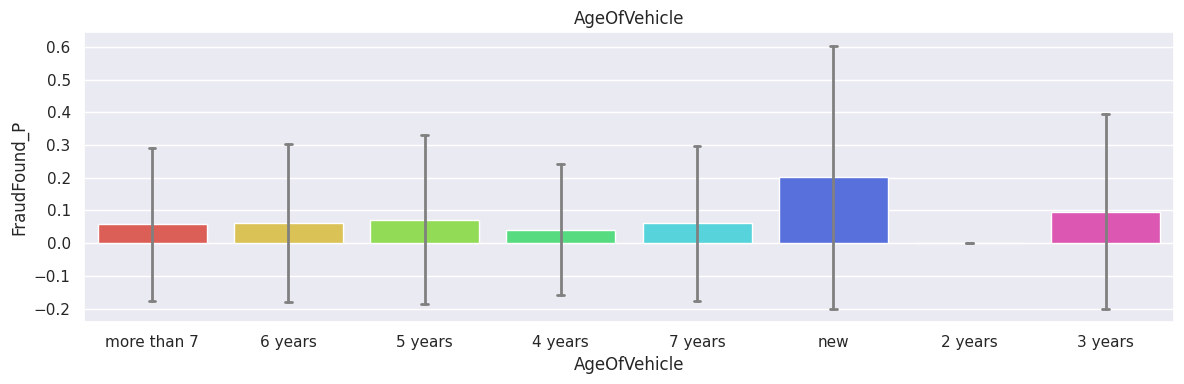

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


AgeOfPolicyHolder
16 to 17    0.219512
18 to 20    0.000000
21 to 25    0.116279
26 to 30    0.054945
31 to 35    0.065096
36 to 40    0.059019
41 to 50    0.051680
51 to 65    0.053165
over 65     0.094203
Name: FraudFound_P, dtype: float64
AgeOfPolicyHolder
16 to 17    0.415609
18 to 20    0.000000
21 to 25    0.324353
26 to 30    0.228502
31 to 35    0.246772
36 to 40    0.235758
41 to 50    0.221522
51 to 65    0.224646
over 65     0.293175
Name: FraudFound_P, dtype: float64


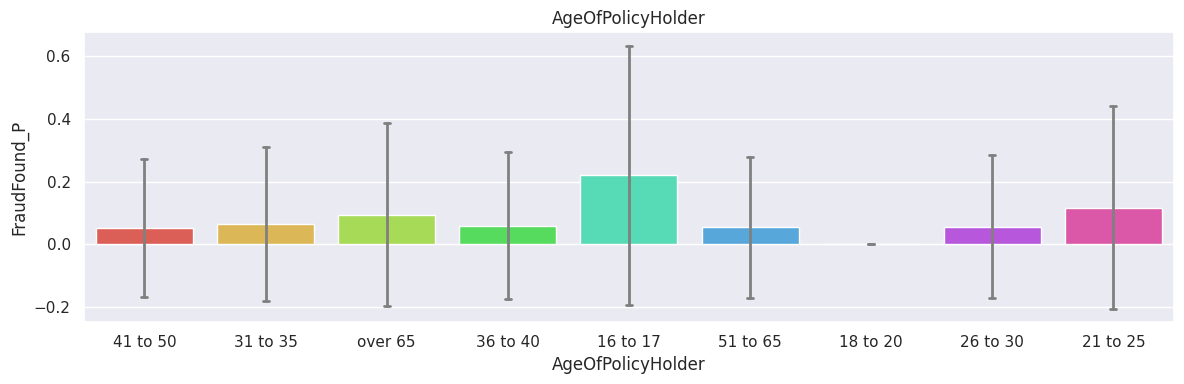

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


PoliceReportFiled
No     0.065967
Yes    0.030000
Name: FraudFound_P, dtype: float64
PoliceReportFiled
No     0.248252
Yes    0.171447
Name: FraudFound_P, dtype: float64


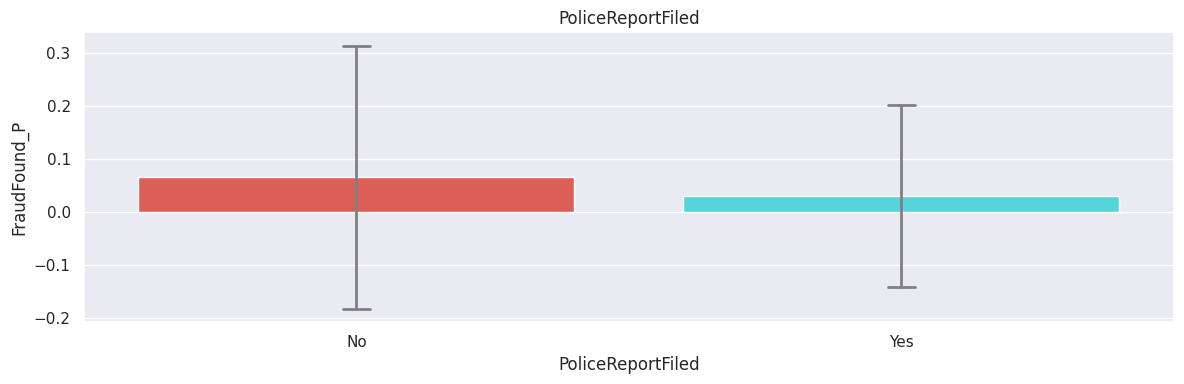

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


WitnessPresent
No     0.065139
Yes    0.068966
Name: FraudFound_P, dtype: float64
WitnessPresent
No     0.246799
Yes    0.257881
Name: FraudFound_P, dtype: float64


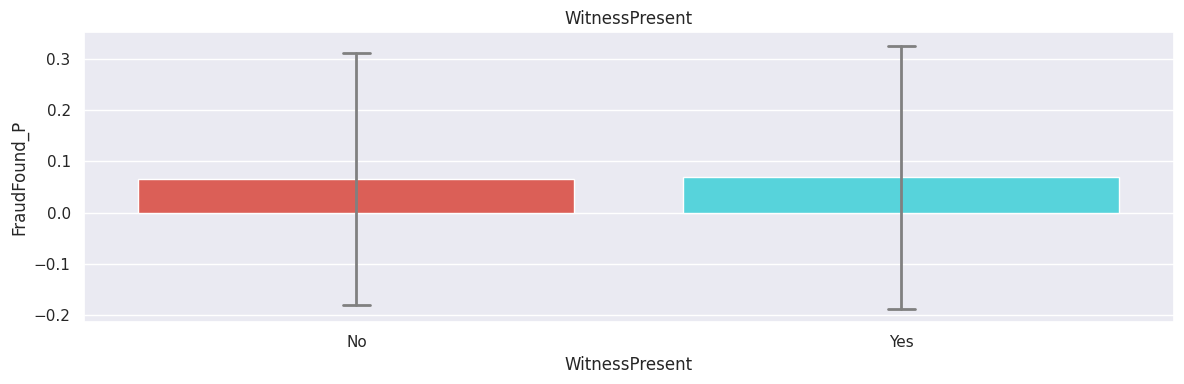

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


AgentType
External    0.066108
Internal    0.000000
Name: FraudFound_P, dtype: float64
AgentType
External    0.248499
Internal    0.000000
Name: FraudFound_P, dtype: float64


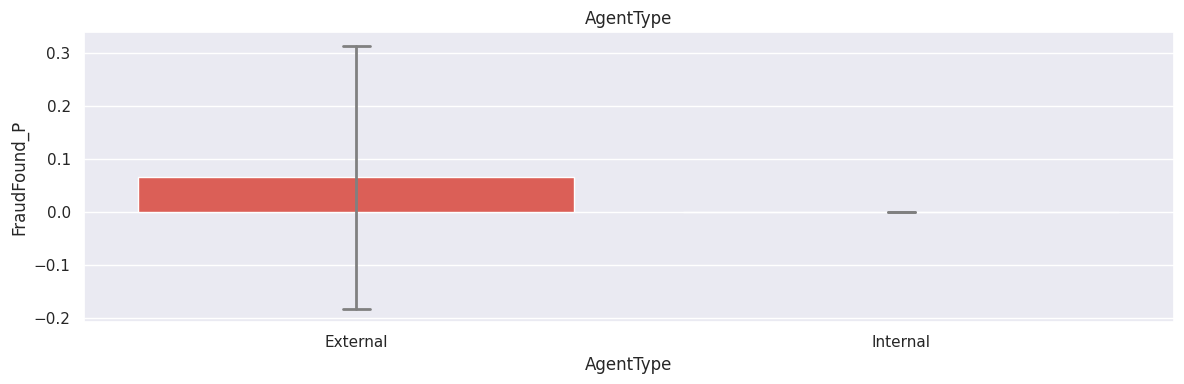

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


NumberOfSuppliments
1 to 2         0.049435
3 to 5         0.050325
more than 5    0.049165
none           0.083213
Name: FraudFound_P, dtype: float64
NumberOfSuppliments
1 to 2         0.216928
3 to 5         0.218792
more than 5    0.216313
none           0.276270
Name: FraudFound_P, dtype: float64


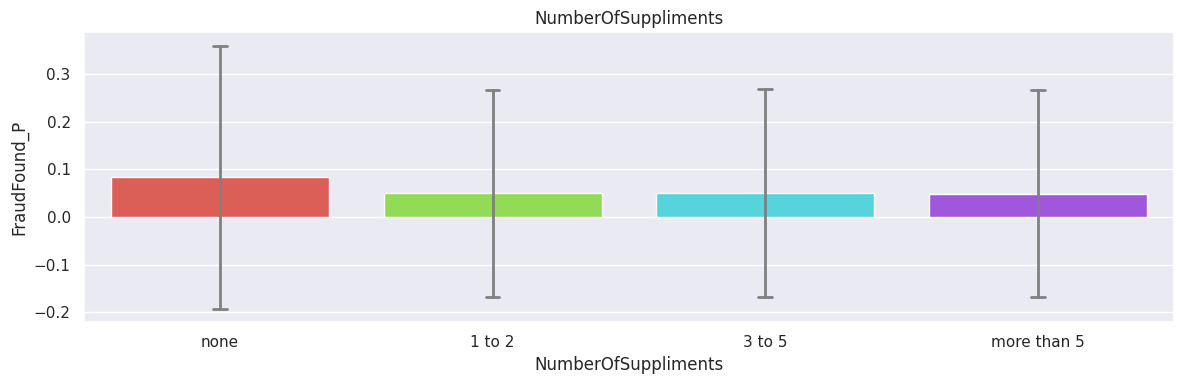

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


AddressChange_Claim
1 year            0.080000
2 to 3 years      0.176471
4 to 8 years      0.065934
no change         0.062019
under 6 months    0.750000
Name: FraudFound_P, dtype: float64
AddressChange_Claim
1 year            0.274048
2 to 3 years      0.383482
4 to 8 years      0.248851
no change         0.241219
under 6 months    0.500000
Name: FraudFound_P, dtype: float64


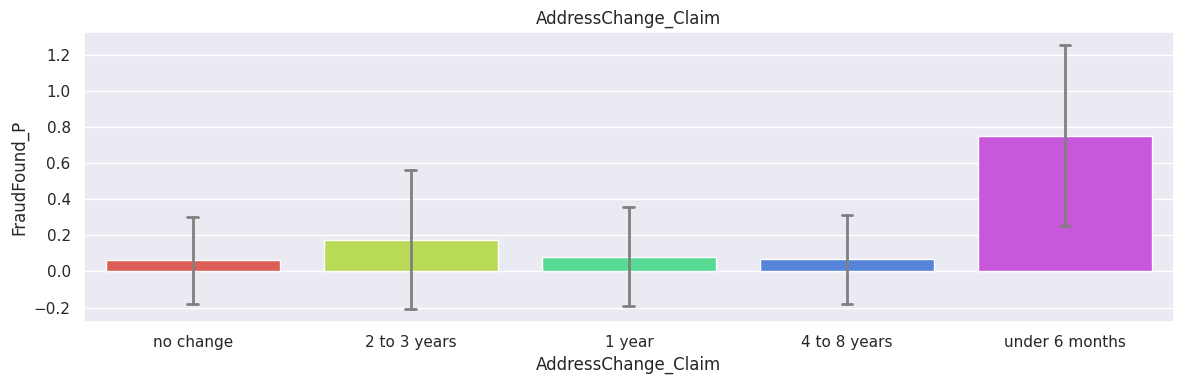

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


NumberOfCars
1 vehicle      0.064019
2 vehicles     0.087379
3 to 4         0.073394
5 to 8         0.000000
more than 8    0.000000
Name: FraudFound_P, dtype: float64
NumberOfCars
1 vehicle      0.244817
2 vehicles     0.283077
3 to 4         0.261987
5 to 8         0.000000
more than 8    0.000000
Name: FraudFound_P, dtype: float64


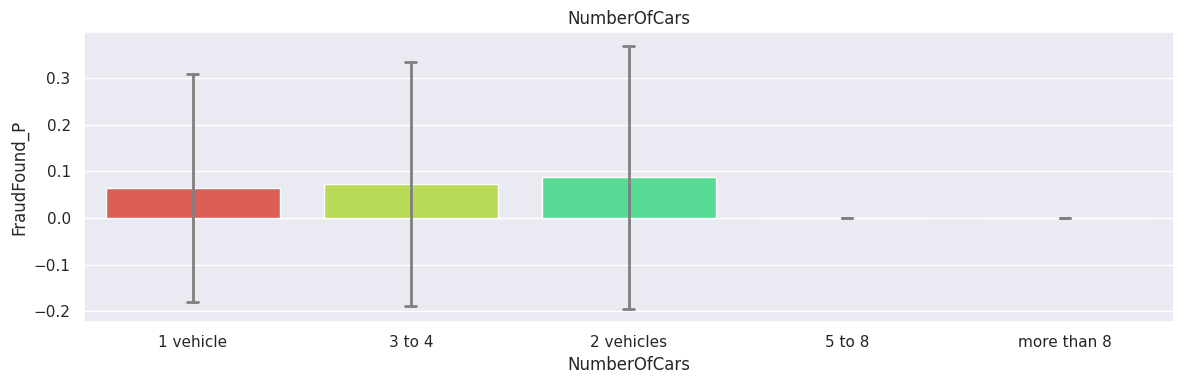

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


Year
1994.0    0.065164
Name: FraudFound_P, dtype: float64
Year
1994.0    0.246843
Name: FraudFound_P, dtype: float64


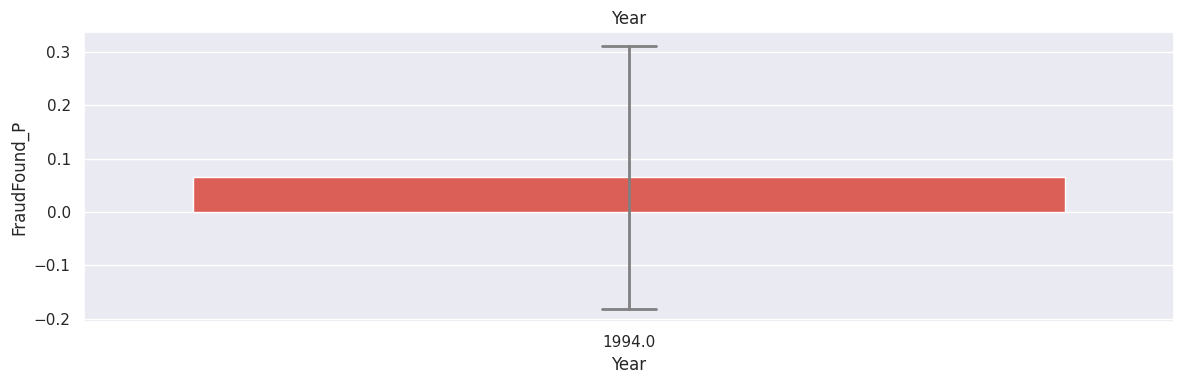

<ipython-input-27-d219b3c33dfe>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
<ipython-input-27-d219b3c33dfe>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).mean()['FraudFound_P'])
<ipython-input-27-d219b3c33dfe>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby([i]).std()['FraudFound_P'])


BasePolicy
All Perils    0.123680
Collision     0.066172
Liability     0.008559
Name: FraudFound_P, dtype: float64
BasePolicy
All Perils    0.329341
Collision     0.248654
Liability     0.092152
Name: FraudFound_P, dtype: float64


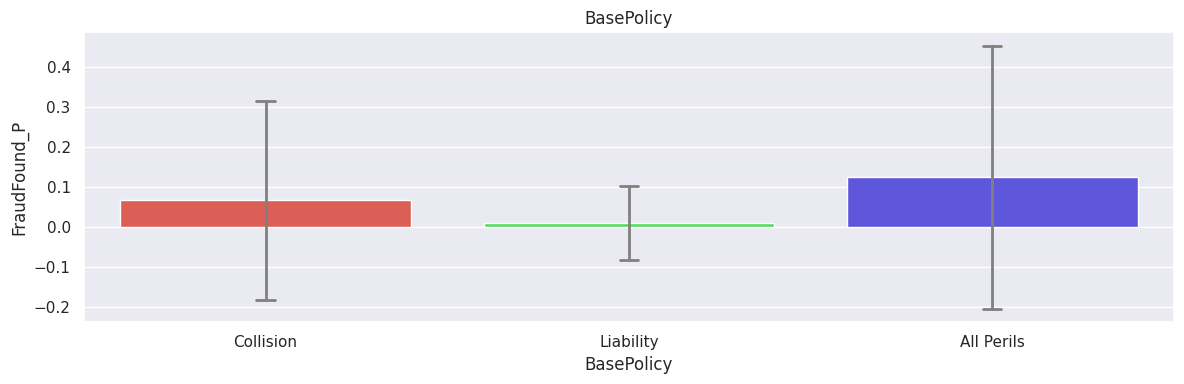

In [27]:
for i in ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy']:
    sns.set() 
    plt.figure(figsize=(12,4))
    ax=sns.barplot(x = i, y = 'FraudFound_P',  data = df, palette = 'hls', capsize = 0.05, saturation = 8,
                   errcolor = 'gray', errwidth = 2, ci = 'sd').set(title=i)
    print(df.groupby([i]).mean()['FraudFound_P'])
    print(df.groupby([i]).std()['FraudFound_P'])
    plt.tight_layout()
    plt.show()

## plotting correlation matrix

<ipython-input-28-7ac8aa6aeacc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


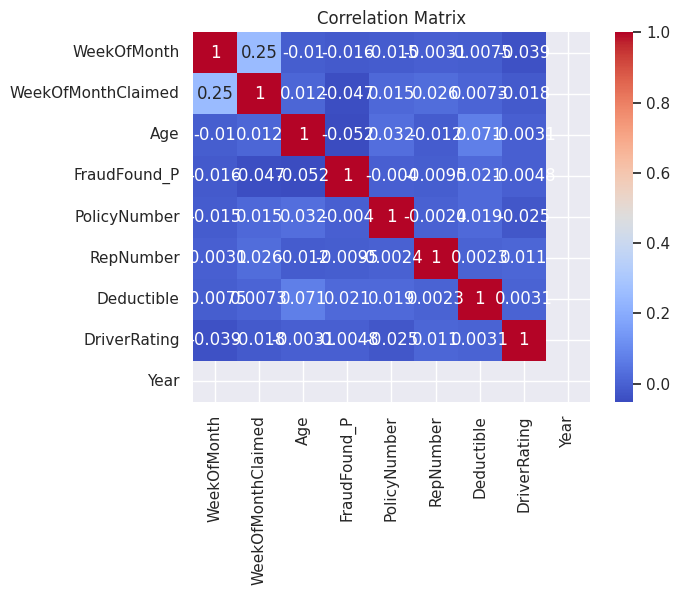

In [28]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## feature encoding

print(df)

In [32]:
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Date
1063,3,1,1,2,1,5,4,1,1,1,...,6,0,0,0,3,3,0,0,1,1
3729,0,0,1,7,1,6,1,0,1,2,...,4,0,0,0,3,3,0,0,1,1
533,4,1,1,11,1,1,5,2,1,1,...,4,0,0,0,0,3,2,0,1,1
3727,8,2,1,15,0,7,9,2,1,2,...,4,0,0,1,3,3,0,0,2,1
3725,8,2,1,11,1,6,9,2,1,2,...,8,0,0,0,1,3,0,0,0,1


In [33]:
X = df.drop(columns='FraudFound_P')
y = df['FraudFound_P']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
x_train.shape, x_test.shape, X.shape

((3136, 33), (1345, 33), (4481, 33))

# PART 2

## testing different models

### Logistic Regression

In [35]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred_LR = model1.predict_proba(x_test)[:, 1]
LR_auc = roc_auc_score(y_test, y_pred_LR)
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_pred_LR)

y_pred1 = model1.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
accuracy_LR = accuracy_score(y_test, y_pred1)
print("Logistic Regression Accuracy:", accuracy_LR)

Logistic Regression Accuracy: 0.9368029739776952


### SVM

In [37]:
model2 = SVC(probability=True)
model2.fit(x_train, y_train)
y_pred_svm = model2.predict_proba(x_test)[:, 1]
svm_auc = roc_auc_score(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

y_pred2 = model2.predict(x_test)

In [38]:
accuracy_SVM = accuracy_score(y_test, y_pred2)
print("SVM Accuracy:", accuracy_SVM)

SVM Accuracy: 0.9382899628252788


### Decision_Trees

In [39]:
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
y_pred_DT = model3.predict_proba(x_test)[:, 1]
dt_auc = roc_auc_score(y_test, y_pred_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_DT)

y_pred3 = model3.predict(x_test)

In [40]:
accuracy_DT = accuracy_score(y_test, y_pred3)
print("Decision Tree Accuracy:", accuracy_DT)

Decision Tree Accuracy: 0.9286245353159851


### Random Forest

In [41]:
model4 = RandomForestClassifier()
model4.fit(x_train, y_train)
y_pred_RF = model4.predict_proba(x_test)[:, 1]
rf_auc = roc_auc_score(y_test, y_pred_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_RF)

y_pred4 = model4.predict(x_test)

In [42]:
accuracy_RF = accuracy_score(y_test, y_pred4)
print("Random Forest Accuracy:", accuracy_RF)

Random Forest Accuracy: 0.937546468401487


### KNN

In [43]:
model5 = KNeighborsClassifier()
model5.fit(x_train, y_train)
y_pred_KNN = model5.predict_proba(x_test)[:, 1]
knn_auc = roc_auc_score(y_test, y_pred_KNN)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_KNN)

y_pred5 = model5.predict(x_test)

In [44]:
accuracy_KNN = accuracy_score(y_test, y_pred5)
print("KNN Accuracy:", accuracy_KNN)

KNN Accuracy: 0.9368029739776952


### Naive Bayes

In [45]:
model6 = GaussianNB()
model6.fit(x_train, y_train)
y_pred_NB = model6.predict_proba(x_test)[:, 1]
nb_auc = roc_auc_score(y_test, y_pred_NB)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_NB)

y_pred6 = model6.predict(x_test)

In [46]:
accuracy_NB = accuracy_score(y_test, y_pred6)
print("KNN Accuracy:", accuracy_NB)

KNN Accuracy: 0.8431226765799257


## plotting ROC 

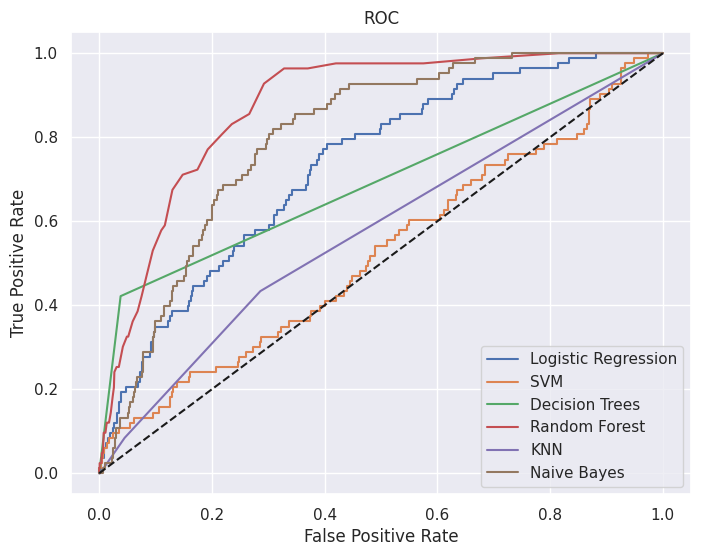

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_LR, tpr_LR, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_dt, tpr_dt, label='Decision Trees')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

# PART 3

In [48]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [49]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()
naive_bayes = GaussianNB()


# Initialize the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the models you want to evaluate
models = [
    ('Logistic Regression', logistic_regression),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('K-Nearest Neighbors', knn),
    ('Support Vector Machines', svm),
    ('Naive Bayes', naive_bayes)
]


In [50]:
# Perform stratified cross-validation and report the performance
for name, model in models:
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {scores}")
    print(f"Average Accuracy: {scores.mean()}")
    print("-----------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Model: Logistic Regression
Cross-Validation Accuracy: [0.9342252  0.93526786 0.93415179 0.93526786 0.93415179]
Average Accuracy: 0.9346128961618092
-----------------------------------------
Model: Decision Tree
Cross-Validation Accuracy: [0.91415831 0.94196429 0.91517857 0.92745536 0.89955357]
Average Accuracy: 0.9196620182353878
-----------------------------------------
Model: Random Forest
Cross-Validation Accuracy: [0.93088071 0.93638393 0.93973214 0.93861607 0.93526786]
Average Accuracy: 0.9361761426978819
-----------------------------------------
Model: K-Nearest Neighbors
Cross-Validation Accuracy: [0.92976589 0.93415179 0.93191964 0.93415179 0.93415179]
Average Accuracy: 0.9328281772575251
-----------------------------------------
Model: Support Vector Machines
Cross-Validation Accuracy: [0.9342252  0.93526786 0.93526786 0.93526786 0.93415179]
Average Accuracy: 0.9348361104475235
-----------------------------------------
Model: Naive Bayes
Cross-Validation Accuracy: [0.80602007 

# PART 4

## Oversampling and Undersampling

In [65]:
over_sampler = RandomOverSampler(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

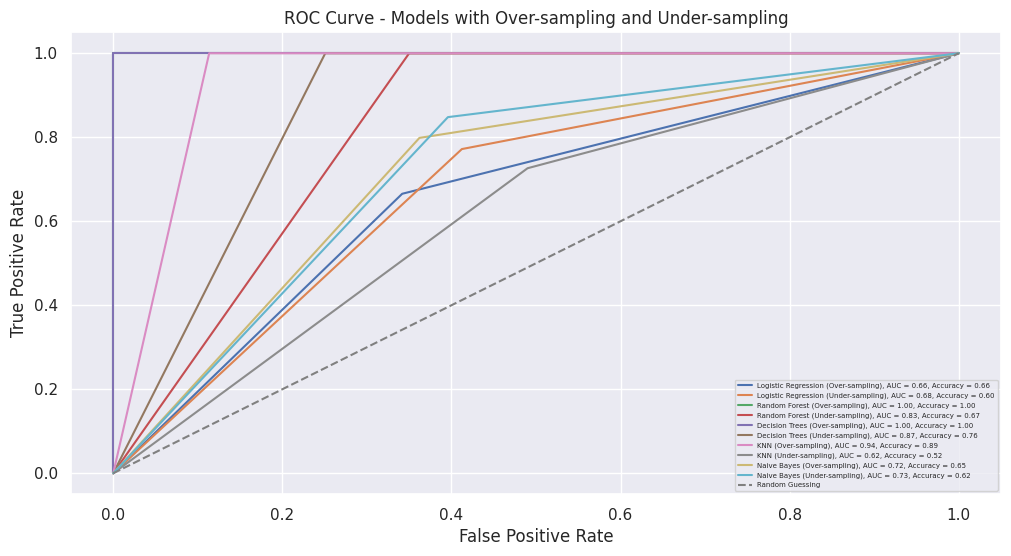

In [72]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

plt.figure(figsize=(12, 6))

for name, model in models:
    over_sampler = RandomOverSampler(random_state=42)
    X_resampled_over, y_resampled_over = over_sampler.fit_resample(X, y)
    model.fit(X_resampled_over, y_resampled_over)
    
    y_pred_over = model.predict(x_test)
    accuracy_over = accuracy_score(y_test, y_pred_over)
    fpr_over, tpr_over, _ = roc_curve(y_test, y_pred_over)
    
    under_sampler = RandomUnderSampler(random_state=42)
    X_resampled_under, y_resampled_under = under_sampler.fit_resample(X, y)
    model.fit(X_resampled_under, y_resampled_under)
    
    y_pred_under = model.predict(x_test)
    
    accuracy_under = accuracy_score(y_test, y_pred_under)
    fpr_under, tpr_under, _ = roc_curve(y_test, y_pred_under)
    plt.plot(fpr_over, tpr_over, label=f"{name} (Over-sampling), AUC = {roc_auc_score(y_test, y_pred_over):.2f}, Accuracy = {accuracy_over:.2f}")
    plt.plot(fpr_under, tpr_under, label=f"{name} (Under-sampling), AUC = {roc_auc_score(y_test, y_pred_under):.2f}, Accuracy = {accuracy_under:.2f}")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Models with Over-sampling and Under-sampling')
plt.legend(fontsize="5")

plt.show()

# PART 5

## changing SVM and Random Forest hyperparameters using XGBoost

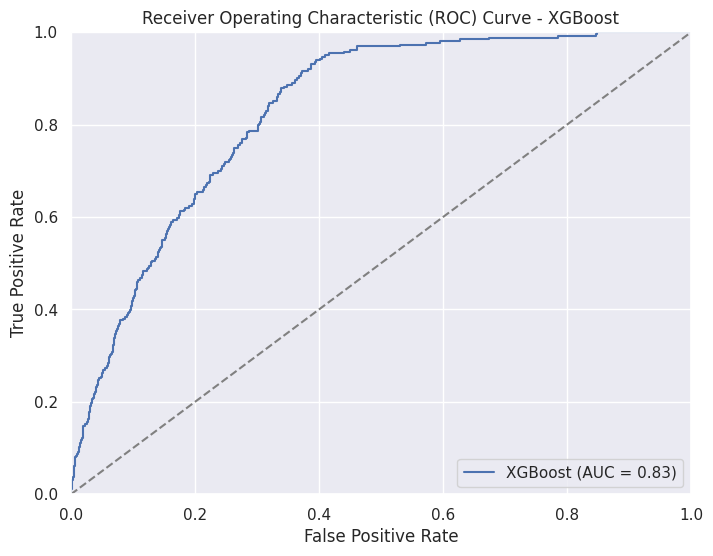

Accuracy - Gradient Boosting: 0.94


In [77]:
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)

# Fit the model
gb_model.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict_proba(x_test)[:, 1]

# Calculate ROC AUC score
roc_score_gb = roc_auc_score(y_test, y_pred_gb)

# Calculate accuracy
y_pred_gb_binary = gb_model.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb_binary)

# Plot ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='XGBoost (AUC = {:.2f})'.format(roc_score_gb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Print accuracy
print("Accuracy - Gradient Boosting: {:.2f}".format(accuracy_gb))

## using different preprocessing methods

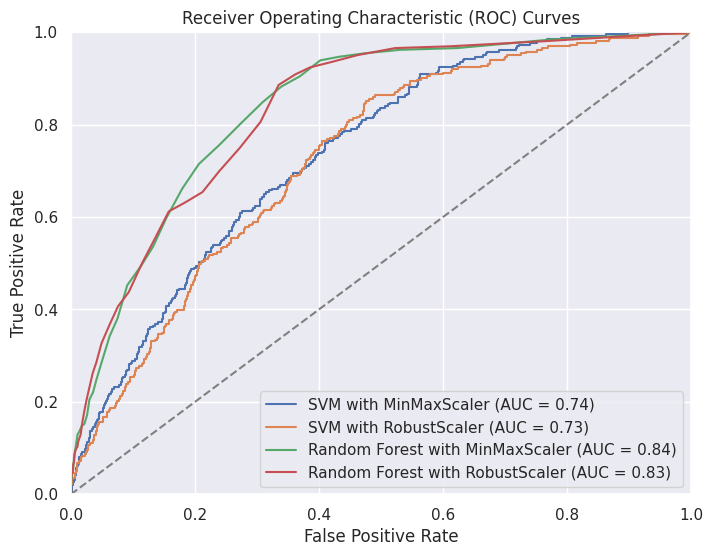

In [80]:
# Preprocessing using MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(x_train)
X_test_minmax = scaler.transform(x_test)

# Preprocessing using RobustScaler
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(x_train)
X_test_robust = scaler.transform(x_test)

# SVM model with MinMaxScaler
svm_minmax = SVC(probability=True)
svm_minmax.fit(X_train_minmax, y_train)
y_pred_svm_minmax = svm_minmax.predict_proba(X_test_minmax)[:, 1]
roc_score_svm_minmax = roc_auc_score(y_test, y_pred_svm_minmax)
fpr_svm_minmax, tpr_svm_minmax, _ = roc_curve(y_test, y_pred_svm_minmax)

# SVM model with RobustScaler
svm_robust = SVC(probability=True)
svm_robust.fit(X_train_robust, y_train)
y_pred_svm_robust = svm_robust.predict_proba(X_test_robust)[:, 1]
roc_score_svm_robust = roc_auc_score(y_test, y_pred_svm_robust)
fpr_svm_robust, tpr_svm_robust, _ = roc_curve(y_test, y_pred_svm_robust)

# Random Forest model with MinMaxScaler
random_forest_minmax = RandomForestClassifier()
random_forest_minmax.fit(X_train_minmax, y_train)
y_pred_rf_minmax = random_forest_minmax.predict_proba(X_test_minmax)[:, 1]
roc_score_rf_minmax = roc_auc_score(y_test, y_pred_rf_minmax)
fpr_rf_minmax, tpr_rf_minmax, _ = roc_curve(y_test, y_pred_rf_minmax)

# Random Forest model with RobustScaler
random_forest_robust = RandomForestClassifier()
random_forest_robust.fit(X_train_robust, y_train)
y_pred_rf_robust = random_forest_robust.predict_proba(X_test_robust)[:, 1]
roc_score_rf_robust = roc_auc_score(y_test, y_pred_rf_robust)
fpr_rf_robust, tpr_rf_robust, _ = roc_curve(y_test, y_pred_rf_robust)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_minmax, tpr_svm_minmax, label='SVM with MinMaxScaler (AUC = {:.2f})'.format(roc_score_svm_minmax))
plt.plot(fpr_svm_robust, tpr_svm_robust, label='SVM with RobustScaler (AUC = {:.2f})'.format(roc_score_svm_robust))
plt.plot(fpr_rf_minmax, tpr_rf_minmax, label='Random Forest with MinMaxScaler (AUC = {:.2f})'.format(roc_score_rf_minmax))
plt.plot(fpr_rf_robust, tpr_rf_robust, label='Random Forest with RobustScaler (AUC = {:.2f})'.format(roc_score_rf_robust))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()